In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import re

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
cd ../../data

/Users/lise/memoire_tech/M2_HN/data


In [3]:
#Chargement du dataframe webscrappé.

with open("textiles.csv") as csv :
    df_textile = pd.read_csv(csv, sep=";")
print(df_textile)

              ID                                        description  \
0    ILCA_ASU001  Cuadro doméstico, de la región de Tinkipaya (P...   
1    ILCA_ASU002  Tapete doméstico, basado en un ponchito, de la...   
2    ILCA_ASU003  Lliclla etnográfica, de la región de Calcha (P...   
3    ILCA_ASU004  Tapete doméstico en base a una lliclla, de la ...   
4    ILCA_ASU005  Medio acso etnográfico, de la región Jalq'a (C...   
..           ...                                                ...   
691  ILCA_VAM024  Banda larga y ancha en faz de urdimbre elabora...   
692  ILCA_VAM025  Fragmento de textil compuesto por dos componen...   
693  ILCA_VAM026  Bolsa-chuspa en faz de trama, de forma cuadrad...   
694  ILCA_VAM027  Fragmento de panel, en faz de trama.\nConsiste...   
695  ILCA_VAM028  Bolsa-chuspa de forma rectangular larga, en fa...   

                                                 image  \
0    ['ASU001_IMG_0754.jpg', 'ASU001_IMG_0755.jpg',...   
1    ['ASU002_IMG_0761.jpg', 'A

### Parcourir les colonnes

In [4]:
for i in range(len(df_textile)) : 
    print(df_textile.loc[i,"technique"])
#print(df_textile.iloc[i, 3]) --> donne résultat similaire

Reselected technique selected in groups, with a derived odd count, 2|1, and 2 wefts
Selected technique with basic odd count, 1|1, and 1 weft
Selected technique counted in pairs, 2|2, and 1 weft, Selected technique with derived odd count, 2|1, and 1 weft
Reselected technique selected in groups, with a derived odd count, 2|1, and 2 wefts
Selected technique with derived odd count, 2|1, and 1 weft
Plainweave technique
Selected technique with derived odd count, 2|1, and 1 weft
Oblique interlacing technique
Complex double cloth technique, with 1 weft, Tubular technique
Complex double cloth technique, with 1 weft, Tubular technique
Oblique interlacing technique, Tubular technique
Weft figure
Dovetailed technique
Selected technique counted in pairs, 2|2, and 2 wefts
Weft figure
Dovetailed technique
Dovetailed technique
Simple double cloth technique, with 2 wefts
Weft figure
Weft figure
Weft figure
Dovetailed technique
Weft figure
Weft figure
Warp and weft crossing technique with paired warps a

### Parcourir les lignes : 

In [5]:
def ligne_df(n: int):
    for name, values in df_textile.items():
        print(f'{name}: {values[n]}')
        
ligne_df(0)

ID: ILCA_ASU001
description: Cuadro doméstico, de la región de Tinkipaya (Potosí, Bolivia), como parte del proyecto Asur de Sucre, en faz de urdimbre, elaborado en fibra de alpaca y lana de ovino.
Es de una sola pieza sin costuras ni acabado.
La composición del cuadro consiste en una banda central mayor con motivos de zigzags con aves, con estructura urdida en tres capas, y técnica de reescogido por unidad (aqllisqa) con conteo por impar derivado, 2|1.
A cada lado hay bandas menores con motivos de chevrones con semillas, igualmente con estructura urdida a tres, y técnica de escogido con conteo por impar derivado, 2|1.
Las bandas están intercaladas con listas medianas y angostas de color, y el cuadro termina con una lista de color negro.
La gama cromática es de rojos, anaranjados, violetas, y verdes, con amarillo y blanco como claros.

image: ['ASU001_IMG_0754.jpg', 'ASU001_IMG_0755.jpg', 'ASU001_IMG_0756.jpg', 'ASU001_IMG_0757.jpg', 'ASU001_IMG_0758.jpg', 'ASU001_IMG_0760.jpg', 'ASU001

### Nombre de pièces textiles dans le _dataframe_

In [6]:
len(df_textile)

696

### Noms des catégories et appel à une catégorie du _dataframe_

In [7]:
#Nombre de catégories 
column_list = df_textile.columns
print(column_list)
print(len(column_list))

def recup_noms_cat(df) :
    col = df.columns
    cat = []
    for i in range(len(col)) : 
        cat.append(col[i])
    print(cat)

recup_noms_cat(df_textile)

a = df_textile.columns
a[1]

Index(['ID', 'description', 'image', 'product', 'period', 'repository',
       'production site', 'find site', 'style', 'motif', 'technique',
       'structure', 'culture', 'composition', 'component', 'thread 1',
       'material', 'type of torsion', 'colour of the thread strands',
       'thickness', 'direction of torsion', 'torsion of thread', 'thread 2',
       'thread 3', 'fabric', 'colour', 'number of colour layers', 'contrast',
       'finish', 'motif attribute', 'scene', 'sequence', 'symmetry', 'size',
       'usage', 'direction of warp', 'thread 4', 'thread 5', 'thread 6'],
      dtype='object')
39
['ID', 'description', 'image', 'product', 'period', 'repository', 'production site', 'find site', 'style', 'motif', 'technique', 'structure', 'culture', 'composition', 'component', 'thread 1', 'material', 'type of torsion', 'colour of the thread strands', 'thickness', 'direction of torsion', 'torsion of thread', 'thread 2', 'thread 3', 'fabric', 'colour', 'number of colour layers', '

'description'

In [8]:
recup_noms_cat(df_textile)

['ID', 'description', 'image', 'product', 'period', 'repository', 'production site', 'find site', 'style', 'motif', 'technique', 'structure', 'culture', 'composition', 'component', 'thread 1', 'material', 'type of torsion', 'colour of the thread strands', 'thickness', 'direction of torsion', 'torsion of thread', 'thread 2', 'thread 3', 'fabric', 'colour', 'number of colour layers', 'contrast', 'finish', 'motif attribute', 'scene', 'sequence', 'symmetry', 'size', 'usage', 'direction of warp', 'thread 4', 'thread 5', 'thread 6']


## Traitement des données manquantes :

In [9]:
#Remplacement de "unknown" par NaN dans les colonnes "Style" et "Culture"
#Passage de respectivement 22.55% et 25.43% de données manquantes à 25.86% et 28.45%
df_textile = df_textile.replace('Unknown', np.nan)
#Remplacement de "unidentified fragment" par NaN dans la colonne "Product"
#Passage de 0% de données manquantes à 4,45%
df_textile = df_textile.replace('Unidentified fragment', np.nan)

df_textile = df_textile.replace('NO DESCRIPTION AVAILABLE', np.nan)

for i in range(len(df_textile)) : 
    print(df_textile.loc[i,"culture"])

Aymara-Quechua-Central Qharaqhara
Quechua-Chicha
Quechua-Chicha
Aymara-Quechua-Central Qharaqhara
Quechua-East Yampara
Quechua-Tarabuco (Central Yampara )
Quechua-East Yampara
Nasca
Nasca-Huari (Late or Proliferous Nasca)
Nasca-Huari (Late or Proliferous Nasca)
Nasca-Huari (Late or Proliferous Nasca)
Chimu
Nasca-Huari (Late or Proliferous Nasca)
Nasca-Huari (Late or Proliferous Nasca)
nan
Huari
Huari
Chancay
Tiwanaku
Tiwanaku
Tiwanaku
Chancay
Chancay
Chancay
Chimu
San Miguel
Ica
Ica
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Maytas-Chiribaya
Chancay
Chancay
Inka
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Chiribaya
Chancay
nan
Chimu
Chancay
Chimu
Chancay
Chancay
Chancay
Chancay
Chancay
Ica
Chancay
Chancay
Chancay
Chancay
Chancay
Chancay
Inka
Chimu
Chancay
Chancay
Chancay
Chancay
Ichma
Chancay
Ica
Chancay
Chancay
Chancay
Chimu
nan
nan
Chimu
Ica
nan
Ica
Chancay
Chimu
Chimu
Chimu
Chimu
Chancay
Chimu
Chimu
Pro

## Obtenir le pourcentage de données manquantes par catégories

Suppression des catégories qui sont au dessus d'un certain seuil de données manquantes.

In [10]:
from statistics import median
from statistics import mean
from statistics import mode
from statistics import quantiles
from statistics import pstdev
from statistics import pvariance

In [11]:
def NaN (df, seuil) :
    df_NaN = df.isna().sum().to_frame(name="Number NaN")
    liste_pourcentage = []
    liste_pourcentage2 = []

    #Récupération du pourcentage de données manquantes pour chaque catégories
    for i in range(len(df_NaN)) :
        liste_pourcentage.append(df_NaN.iloc[i]["Number NaN"])
    for elt in liste_pourcentage :
        elt2 = elt/696*100
        liste_pourcentage2.append(elt2)

    df_NaN["Pourcentage de NaN"] = liste_pourcentage2
    
    print(f'\nMédiane : {median(liste_pourcentage2)} \nMoyenne : {mean(liste_pourcentage2)} \nÉcart-type : {pstdev(liste_pourcentage2)} \nVariance : {pvariance(liste_pourcentage2)} \n')
    
    print(df_NaN)
    
    #Suppression des catégories qui ont un pourcentage de NaN trop élevé.
    suppr = []
    for i in range(len(df_NaN)):
        if df_NaN.iloc[i, 1] >= seuil :
            suppr.append(df_textile.columns[i])
    print(suppr)

    df = df.drop(suppr, axis=1)
    
    print(len(df.columns))
    #return df

In [12]:
#Fonction fonctionnelle mais l'objet rendu n'est pas utilisé dans la suite (rendu des fonctions à revoir)
NaN(df_textile, 90.0)


Médiane : 36.92528735632184 
Moyenne : 47.734305923961095 
Écart-type : 43.12595764479208 
Variance : 1859.8482227804006 

                              Number NaN  Pourcentage de NaN
ID                                     0            0.000000
description                            7            1.005747
image                                  0            0.000000
product                               31            4.454023
period                                 4            0.574713
repository                             0            0.000000
production site                        0            0.000000
find site                            317           45.545977
style                                180           25.862069
motif                                  3            0.431034
technique                              3            0.431034
structure                              0            0.000000
culture                              198           28.448276
composition           

## Nombre moyen d'images par pièces textiles

In [13]:
def mean_images (df) :
    # Calculer le nombre moyen d'image par pièces textiles / représentation en boîte à moustache
    #Liste avec ID et liste avec nombre d'images dans la liste (juste les jpg)

    ID = []
    for i in range(len(df)) : 
        ID.append((df.loc[i,"ID"]))

    nombre_image = []
    nombre_schema = []

    for i in range(len(df)) : 
        count_image = 0
        count_schema  = 0
        colonne_image = df.loc[i,"image"].split(',')
        for a in range(len(colonne_image)) :

            if "jpg" in colonne_image[a] : 
                count_image+=1
            else :
                count_schema = len(colonne_image)-count_image

        nombre_image.append(count_image)
        nombre_schema.append(count_schema)

    #print(nombre_image)  
    #print(nombre_schema)

    class_nb_image = []

    for i in set(nombre_image): 
        a = nombre_image.count(i)
        class_nb_image.append(a)

    fig, ax = plt.subplots()
    bar_container = ax.bar(list(set(nombre_image)), class_nb_image)
    ax.set(ylabel="Nombre de textiles selon leur quantité d'images", xlabel="Nombre d'images disponibles par textile", ylim=(0, 160))


    class_nb_schema = []

    for i in set(nombre_schema): 
        a = nombre_schema.count(i)
        class_nb_schema.append(a)

    fig, ax = plt.subplots()
    bar_container = ax.bar(list(set(nombre_schema)), class_nb_schema)
    ax.set(ylabel="Nombre de textiles selon leur quantité de schémas", xlabel="Nombre de schémas disponibles", ylim=(0, 600))
    ax.bar_label(bar_container)


    plt.show()

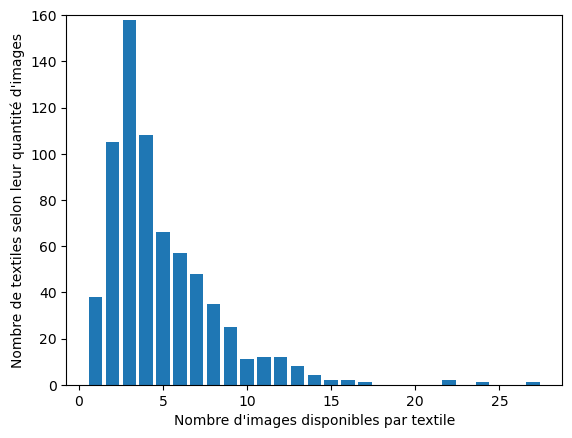

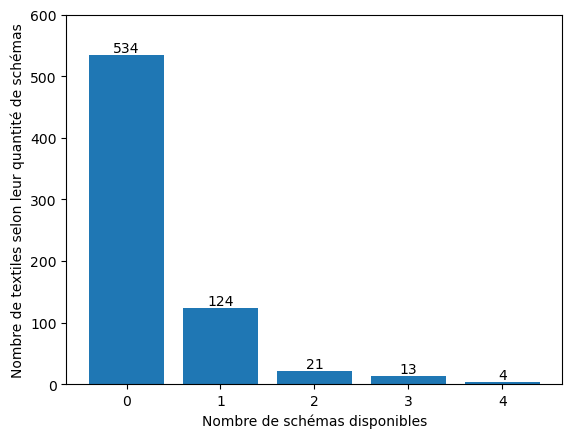

In [14]:
mean_images(df_textile)

### Répartition et homogénéisation des périodes historiques des textiles

In [15]:
#Problème : périodes historiques se répètent ou se superposent = pour un meilleur traitement, alignement des différentes périodes

df_textile['period'] = df_textile['period'].replace('Late Republican Period (1900-present)', 'Republican Period (1825-present)')
df_textile['period'] = df_textile['period'].replace('Late Intermediate (1000-1400 AD)', 'Late Intermediate (1000-1470 AD)')
df_textile['period'] = df_textile['period'].replace('Late Horizon (1400-1535 AD)', 'Late Horizon (1470-1535 AD)')
df_textile['period'] = df_textile['period'].replace('Middle Period (400-900 AD)', 'Middle Horizon (600-1000 AD)')
df_textile['period'] = df_textile['period'].replace('Middle Horizon (600-900/1000 AD)', 'Middle Horizon (600-1000 AD)')
df_textile['period'] = df_textile['period'].replace('Middle Horizon (400-1000 AD)', 'Middle Horizon (600-1000 AD)')
df_textile['period'] = df_textile['period'].replace('Late Intermediate (900-1420 AD)', 'Late Intermediate (1000-1470 AD)')
df_textile['period'] = df_textile['period'].replace('Late Intermediate (1000-1430 AD)', 'Late Intermediate (1000-1470 AD)')
df_textile['period'] = df_textile['period'].replace('Early Republican Period (1825-1900 AD)', 'Republican Period (1825-present)')
df_textile['period'] = df_textile['period'].replace('Late Colonial Period (1780-1825 AD)', 'Colonial Period (1535-1824 AD)')
df_textile['period'] = df_textile['period'].replace('Early Intermediate (200 BC-600 AD)', 'Early Intermediate (200 BC-600 AD)')
df_textile['period'] = df_textile['period'].replace('Late Horizon (1420-1535 AD)', 'Late Horizon (1470-1535 AD)')
df_textile['period'] = df_textile['period'].replace('Early Colonial Period (1535-1780 AD)', 'Colonial Period (1535-1824 AD)')
df_textile['period'] = df_textile['period'].replace('Late Horizon (1430-1540 AD)', 'Late Horizon (1470-1535 AD)')
df_textile['period'] = df_textile['period'].replace('Early Horizon (900-200 BC)', 'Early Horizon (900-200 BC)')
df_textile['period'] = df_textile['period'].replace('Early Formative (1800-300 BC)', 'Initial Period OR Early Horizon (1800-200 BC)')
df_textile['period'] = df_textile['period'].replace('Late Formative (400-900 AD)', 'Middle Horizon (600-1000 AD)')
df_textile['period'] = df_textile['period'].replace('Late Formative (300 BC-400 AD)', 'Early Intermediate (200 BC-600 AD)')

In [16]:
colonne_period = df_textile.loc[:,'period']
print(colonne_period.value_counts())
print(colonne_period.value_counts(normalize=True))

period
Republican Period (1825-present)                 360
Late Intermediate (1000-1470 AD)                 156
Middle Horizon (600-1000 AD)                      94
Late Horizon (1470-1535 AD)                       54
Colonial Period (1535-1824 AD)                    15
Early Intermediate (200 BC-600 AD)                 9
Early Horizon (900-200 BC)                         2
Initial Period OR Early Horizon (1800-200 BC)      2
Name: count, dtype: int64
period
Republican Period (1825-present)                 0.520231
Late Intermediate (1000-1470 AD)                 0.225434
Middle Horizon (600-1000 AD)                     0.135838
Late Horizon (1470-1535 AD)                      0.078035
Colonial Period (1535-1824 AD)                   0.021676
Early Intermediate (200 BC-600 AD)               0.013006
Early Horizon (900-200 BC)                       0.002890
Initial Period OR Early Horizon (1800-200 BC)    0.002890
Name: proportion, dtype: float64


### Récupération des nomenclatures avec _value_count_

In [17]:
def recup_voc_df (nom_colonne) :
    colonne = df_textile.loc[:,nom_colonne]
    df = pd.DataFrame(colonne.value_counts())
    ratio = colonne.value_counts(normalize=True).to_list()
    df['ratio'] = ratio
    return df

In [18]:
recup_voc_df('repository')

,count,ratio
repository,,
"Aymara Language and Culture Institute, website",248,0.356322
"British Museum, website",149,0.214080
"National Museum of Ethnography and Folklore, website",106,0.152299
"Archaeological and Anthropological Museum of San Miguel de Azapa, website",47,0.067529
"Casa Nacional de Moneda Museum, website",25,0.035920
"National Archaeological Museum, website",25,0.035920
"Victoria and Albert Museum, website",24,0.034483
"Museo Casa del Corregidor, website",18,0.025862
"Institute of Anthropological Research and Archaeological Museum, Universidad Mayor de San Simón, website",15,0.021552


In [19]:
for cat in df_textile.columns : 
    print(recup_voc_df(cat))

              count     ratio
ID                           
ILCA_ASU001       1  0.001437
ILCA_MEE084       1  0.001437
ILCA_MEE077       1  0.001437
ILCA_MEE078       1  0.001437
ILCA_MEE079       1  0.001437
...             ...       ...
ILCA_ILCA060      1  0.001437
ILCA_ILCA061      1  0.001437
ILCA_ILCA062      1  0.001437
ILCA_ILCA063      1  0.001437
ILCA_VAM028       1  0.001437

[696 rows x 2 columns]
                                                    count     ratio
description                                                        
Maqueta de tipo textil didáctico, de modelo par...     10  0.014514
Maqueta de tipo textil didáctico, de modelo par...      3  0.004354
Maqueta de tipo textil didáctico, de modelo par...      3  0.004354
Maqueta de tipo textil didáctico, de modelo par...      2  0.002903
Maqueta de tipo textil didáctico, de modelo par...      2  0.002903
...                                                   ...       ...
Bolsita personal moderna de forma cuadrada

## Récupération du thésaurus pour chaque catégorie
(Ensemble du vocabulaire utilisé pour chaque catégorie)

In [20]:
def recup_voc_ontology(df) :
#Création d'un dossier qui contiendra l'ensemble des documents textes composant l'ontologie
    if not os.path.exists('ontology'):
        os.mkdir('ontology')
        os.chdir('ontology')
    else :
        os.chdir('ontology')
        
#Récupération de la liste des catégories de métadonnées
    col = df.columns
    category = []
    for i in range(len(col)) : 
        category.append(col[i])
    category.remove("description")
    category.remove("image")
    category.remove("repository")
    category.remove("sequence")
    category.remove("technique")
    

#Création d'un dictionnaire qui a pour clé la catégorie et chaque valeur possible pour cette catégorie.
    for cat in category :
        with open (f'ontologie_{cat}.txt', 'w') as ontology :
            vocab = {}
            elts = []
            data_column = df.loc[:, cat].dropna().to_list()
            for elt in data_column :  
                list_voc = elt.split(',')
                for elt2 in list_voc : 
                    elt2 = elt2.lstrip()
                    elts.append(elt2)   
            vocab[cat] = list(set(elts))

            ontology.write(f"{cat}\n")
            for name in vocab[cat]:
                ontology.write(f"- {name}\n")
                
#On refait la même chose mais pour les trois catégories pour lesquelle les informations après la virgule ne peuvent pas être séparées
    list_missing_cat = ['repository', 'sequence', 'technique']
    for cat2 in list_missing_cat :
        with open (f'ontologie_{cat2}.txt', 'w') as ontology : 
            data_column = df.loc[:, cat2].to_list()
            vocab[cat2] = list(set(data_column))

            ontology.write(f"{cat2}\n")
            for name in vocab[cat2]:
                ontology.write(f"- {name}\n")

#On sort du répertoire ontology pour les fonctions suivantes
    os.chdir('..')

In [21]:
recup_voc_ontology(df_textile)

### Nombre de pièces par institution patrimoniale

In [25]:
colonne_repository = df_textile.loc[:,'repository']
print(colonne_repository.value_counts())

repository
Aymara Language and Culture Institute, website                                                              248
British Museum, website                                                                                     149
National Museum of Ethnography and Folklore, website                                                        106
Archaeological and Anthropological Museum of San Miguel de Azapa, website                                    47
Casa Nacional de Moneda Museum, website                                                                      25
National Archaeological Museum, website                                                                      25
Victoria and Albert Museum, website                                                                          24
Museo Casa del Corregidor, website                                                                           18
Institute of Anthropological Research and Archaeological Museum, Universidad Mayor de San Sim

## Extraction du dataFrame nettoyé

In [51]:
df_textile.to_csv('textile_clean.csv',sep='\t', encoding='utf-8', index=False)